# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

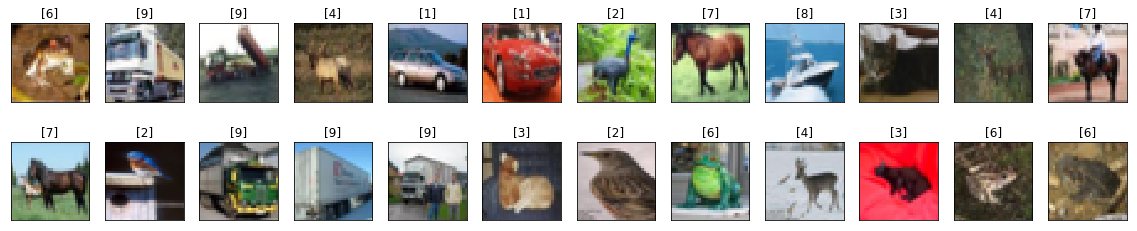

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,4))
for i in range(24):
    ax = fig.add_subplot(2, 12, i+1, xticks=[], yticks= [])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title(y_train[i])

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [15]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [17]:
len(x_train)

50000

In [18]:
from keras.utils import np_utils

num_classes= len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [53]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 7. Train the Model 

In [54]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.mine.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=2, callbacks=[checkpointer], 
          validation_data=(x_valid, y_valid), shuffle=True)


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 29s - loss: 0.8934 - acc: 0.6882 - val_loss: 0.8417 - val_acc: 0.7118

Epoch 00001: val_loss improved from inf to 0.84170, saving model to model.weights.best.hdf5
Epoch 2/100
 - 27s - loss: 0.8590 - acc: 0.6982 - val_loss: 0.8464 - val_acc: 0.7090

Epoch 00002: val_loss did not improve from 0.84170
Epoch 3/100
 - 26s - loss: 0.8301 - acc: 0.7099 - val_loss: 0.7917 - val_acc: 0.7184

Epoch 00003: val_loss improved from 0.84170 to 0.79168, saving model to model.weights.best.hdf5
Epoch 4/100
 - 26s - loss: 0.8109 - acc: 0.7163 - val_loss: 0.7862 - val_acc: 0.7192

Epoch 00004: val_loss improved from 0.79168 to 0.78619, saving model to model.weights.best.hdf5
Epoch 5/100
 - 26s - loss: 0.7933 - acc: 0.7227 - val_loss: 0.7739 - val_acc: 0.7336

Epoch 00005: val_loss improved from 0.78619 to 0.77391, saving model to model.weights.best.hdf5
Epoch 6/100
 - 26s - loss: 0.7700 - acc: 0.7314 - val_loss: 0.7919 - val_acc: 0.7260

Epoc

 - 41s - loss: 0.5402 - acc: 0.8198 - val_loss: 0.7863 - val_acc: 0.7388

Epoch 00057: val_loss did not improve from 0.70735
Epoch 58/100
 - 41s - loss: 0.5302 - acc: 0.8218 - val_loss: 0.7343 - val_acc: 0.7578

Epoch 00058: val_loss did not improve from 0.70735
Epoch 59/100
 - 35s - loss: 0.5363 - acc: 0.8205 - val_loss: 0.8266 - val_acc: 0.7666

Epoch 00059: val_loss did not improve from 0.70735
Epoch 60/100
 - 39s - loss: 0.5274 - acc: 0.8226 - val_loss: 0.7461 - val_acc: 0.7634

Epoch 00060: val_loss did not improve from 0.70735
Epoch 61/100
 - 39s - loss: 0.5284 - acc: 0.8237 - val_loss: 0.7376 - val_acc: 0.7596

Epoch 00061: val_loss did not improve from 0.70735
Epoch 62/100
 - 36s - loss: 0.5214 - acc: 0.8248 - val_loss: 0.7534 - val_acc: 0.7524

Epoch 00062: val_loss did not improve from 0.70735
Epoch 63/100
 - 34s - loss: 0.5258 - acc: 0.8228 - val_loss: 0.8238 - val_acc: 0.7356

Epoch 00063: val_loss did not improve from 0.70735
Epoch 64/100
 - 34s - loss: 0.5267 - acc: 0.824

### 8. Load the Model with the Best Validation Accuracy

In [55]:
model.load_weights('model.weights.best.mine.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [56]:
score = model.evaluate(x_test, y_test)

print(score[1])

10000/10000 [==============================] - 4s 441us/step
0.7531


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [30]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_hat = model.predict(x_test)

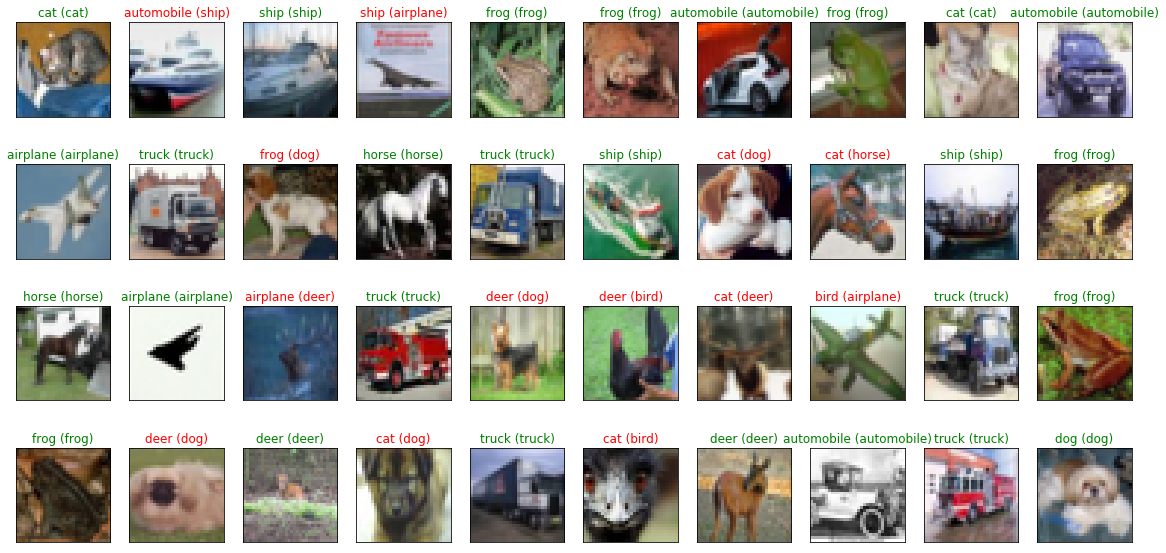

In [38]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(x_test[:40]):
    ax = fig.add_subplot(4, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))
    pidx = np.argmax(y_hat[i])
    tidx = np.argmax(y_test[i])
    ax.set_title("{} ({})".format(cifar10_labels[pidx], cifar10_labels[tidx]),
                color='green' if pidx==tidx else 'red')